# Simulate the model and make Figure SI-1

## Imports

First run all of the code in this section to import the necessary packages. 

First we load some magic commands:

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Next load some standard modules. If you do not have one of these modules (such as [progressbar](https://pypi.python.org/pypi/progressbar2) or [joblib](https://pypi.python.org/pypi/joblib)), then run, for example, `!pip install progressbar` to install it using `pip`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import time, datetime
import progressbar
import pickle
import os
from itertools import product
from joblib import Parallel, delayed
from scipy import stats
import sys
sys.setrecursionlimit(10000) # to be able to pickle the results of simulations and avoid a RecursionError

Set style parameters for matplotlib figures:

In [3]:
from matplotlib import rc
rc('font', **{'family': 'sans-serif','sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc('axes', **{'titlesize': 10, 'labelsize': 8})
rc('legend', **{'fontsize': 9})

Set the path for saving the figures:

In [4]:
figures_path = os.path.join(os.pardir, 'figures')
if not os.path.exists(figures_path):
    os.mkdir(figures_path)

Import the code for simulating the model:

In [5]:
import ABM
import EconomySimulator

## Panel (a): long-run fraction functional as a function of the initial condition

### Compute the data (takes about 1.5 hours to run)

The code in the cell below creates a pandas DataFrame called `long_run_results`. It in `long_run_results` the dictionary returned by the function `EconomySimulator.simulate_economy_long_run`. This dictionary contains some measures of the state of the model economy after 1000 production attempts have been simulated. 

The function `run_long_run_sim` sets the parameters of the economy, and the for loop iterates over the initial condition `F0` (the initial fraction of functional agents), `r` in `[1, 2000]`, `xi` in `[0, 1]`, and a trial index `trial` in `range(1000)` (we run 1000 trials for each initial condition).


**Warning**: _This code takes about 1.5 hours to run on a laptop computer_. To avoid having to re-run this, run the cell under the section heading **Load `long_run_results` from the hard drive** below.

In [ ]:
def run_long_run_sim(trial_number, F0, r, xi):
    n_agents = 200
    beta = .4
    n_steps = 5 * n_agents
    L = 1
    exog_fail = 0.0001
    alpha = 0.15
    tolerance_std = 0.0
    n_steps_detect_fixed_point = 50

    return EconomySimulator.simulate_economy_long_run(
        n_agents=n_agents, init_fraction_functional=F0,
        alpha=alpha, beta=beta, r=r, L=L, xi=xi, exog_fail=exog_fail,
        n_steps=n_steps, trial=trial_number,
        tolerance_std=tolerance_std, n_steps_detect_fixed_point=n_steps_detect_fixed_point)

try:
    long_run_results
except NameError:
    long_run_results = None

start_time = time.time()
long_run_results = pd.concat([long_run_results, pd.DataFrame(
    Parallel(n_jobs=4)(
        delayed(run_long_run_sim)(trial, F0, r, xi)
        for trial in range(1000)
        for F0 in np.arange(.155, .205, .01)
        for r in [1., 2000.]
        for xi in [0, 1]
    )
)])
end_time = time.time()
print(datetime.timedelta(seconds=(end_time - start_time)))

This confirms that we have 1000 simulations for each quadruple `(r, xi, n_agents, init_F)`.

In [7]:
long_run_results.groupby(['r', 'xi', 'n_agents', 'init_F']).size()

r       xi  n_agents  init_F
1.0     0   200       0.140     1000
                      0.150     1000
                      0.155     1000
                      0.160     1000
                      0.165     1000
                      0.170     1000
                      0.175     1000
                      0.180     1000
                      0.185     1000
                      0.190     1000
                      0.195     1000
                      0.200     1000
        1   200       0.140     1000
                      0.150     1000
                      0.155     1000
                      0.160     1000
                      0.165     1000
                      0.170     1000
                      0.175     1000
                      0.180     1000
                      0.185     1000
                      0.190     1000
                      0.195     1000
                      0.200     1000
2000.0  0   200       0.140     1000
                      0.150     1000
         

#### Save the data to the hard drive as a `CSV` file

In [ ]:
long_run_results.to_csv(
    os.path.join(
        'simulated_data',
        'long_run_results_n200_alpha0p15_beta0p4_epsilon0p0001.csv'))

#### Load `long_run_results` from the hard drive

Run the code below to load the results from the CSV file in order to avoid having to re-run the simulations above (which takes about 90 minutes):

In [6]:
long_run_results = pd.read_csv(
    os.path.join(
        'simulated_data',
        'long_run_results_n200_alpha0p15_beta0p4_epsilon0p0001.csv'),
    index_col=0)

## Panel (b): show two representative time-series

#### Simulate the original model and the model with sticky links and preferential attachment

Either 

* run the simulations below (which should take around 50 minutes to run), or 
* load the results of those simulations that were pickled (scroll down to the heading **Load the simulations from the `pickle` file `sim_N1000_alpha0p15_beta0p4eps0p0001_initF0p7.pkl`**).

##### Simulate the original model 

Set up the simulation:

In [ ]:
sim_N1000_alpha0p15_beta0p4_r1_xi0_eps0p0001_initF0p7 = EconomySimulator.AssortativitySimulator(
    ABM.Economy(1000, .7, alpha=.15, beta=.4, r=1, exog_fail=0.0001, xi=0))

This takes about 22 minutes to run:

In [ ]:
sim_N1000_alpha0p15_beta0p4_r1_xi0_eps0p0001_initF0p7.simulate(200000)

Plot some time-series from the simulation:

In [ ]:
sim_N1000_alpha0p15_beta0p4_r1_xi0_eps0p0001_initF0p7.combined_plot()

##### Simulate the model with sticky links and preferential attachment

Set up the simulation:

In [ ]:
sim_N1000_alpha0p15_beta0p4_r2000_xi1_eps0p0001_initF0p7 = EconomySimulator.AssortativitySimulator(
    ABM.Economy(1000, .7, alpha=.15, beta=.4, r=2000., exog_fail=0.0001, xi=1))

This takes about 25 minutes to run:

In [ ]:
sim_N1000_alpha0p15_beta0p4_r2000_xi1_eps0p0001_initF0p7.simulate(200000)

Plot some time-series from the simulation:

In [ ]:
sim_N1000_alpha0p15_beta0p4_r2000_xi1_eps0p0001_initF0p7.combined_plot()

#### Save and load the two simulations above using `pickle`

###### Save (pickle) the simulations to file `sim_N1000_alpha0p15_beta0p4eps0p0001_initF0p7.pkl`:

In [ ]:
with open(os.path.join('simulated_data', 'sim_N1000_alpha0p15_beta0p4_eps0p0001_initF0p7_r1_xi0.pkl'), 'wb') as f:
    pickle.dump(sim_N1000_alpha0p15_beta0p4_r1_xi0_eps0p0001_initF0p7, f)

with open(os.path.join('simulated_data', 'sim_N1000_alpha0p15_beta0p4_eps0p0001_initF0p7_r2000_xi1.pkl'), 'wb') as f:
    pickle.dump(sim_N1000_alpha0p15_beta0p4_r2000_xi1_eps0p0001_initF0p7, f)

###### Load the simulations from the `pickle` file `sim_N1000_alpha0p15_beta0p4eps0p0001_initF0p7.pkl`:

Run the code below to avoid having to run the two simulations above:

In [8]:
with open(os.path.join('simulated_data', 'sim_N1000_alpha0p15_beta0p4_eps0p0001_initF0p7_r1_xi0.pkl'), 'rb') as f:
    sim_N1000_alpha0p15_beta0p4_r1_xi0_eps0p0001_initF0p7 = pickle.load(f)

with open(os.path.join('simulated_data', 'sim_N1000_alpha0p15_beta0p4_eps0p0001_initF0p7_r2000_xi1.pkl'), 'rb') as f:
    sim_N1000_alpha0p15_beta0p4_r2000_xi1_eps0p0001_initF0p7 = pickle.load(f)

## Make Figure SI-1

The cell below makes Figure SI-1 and saves it to the folder `figures` as a PDF.

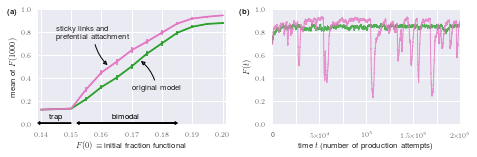

In [9]:
data = long_run_results
data.init_F = np.round(data.init_F, 3)
data = data[((data.r == 1) & (data.xi == 0)) | ((data.r > 1) & (data.xi > 0))]
grouped_by_r_xi = data.groupby(['r', 'xi'])

fig, ax = plt.subplots(ncols=2, figsize=(3.4 * 2 * .95, 3.4 / 5 * 3))

colors = ['#2ca02c', '#e377c2']
handles = []
labels = []
indx = 0
for r_xi, r_df in grouped_by_r_xi:
    color = colors[indx]
    indx += 1
    labels.append(r_xi)
    linestyle = {0: '-', 1: '--'}.get(r_xi[1])
    data_final_F = (
        r_df.groupby('init_F')['final_F']
            .agg({
                'mean_final_F': np.mean,
                'std_final_F': np.std,
                'num_trials': 'size',
                'sem_final_F': lambda final_F: np.std(final_F) / len(final_F)**.5,
                '75_percentile_final_F': lambda final_F: np.percentile(final_F, 75.),
                '25_percentile_final_F': lambda final_F: np.percentile(final_F, 25.)}))
    handle, = ax[0].plot(data_final_F.index, data_final_F.mean_final_F, label=str(r_xi),
                      color=color, alpha=1, linewidth=1,
                      linestyle='-')
    ax[0].errorbar(data_final_F.index, data_final_F.mean_final_F,
                   yerr=2 * data_final_F.sem_final_F,
                   label=str(r_xi),
                   color=color)
    handles.append(handle)
ax[0].set_xlabel(r'$F(0) \equiv$ initial fraction functional')
ax[0].set_ylabel(r'mean of $F(1000)$')
ax[0].set_ylim(0, 1)
xlim = (0.14 - .001, .201)
ax[0].set_xlim(*xlim)

height_trap_label = .01
label_size = 8
ax[0].annotate(
    "",
    xy=(xlim[0], height_trap_label),
    xytext=(.15, height_trap_label),
    arrowprops=dict(linewidth=1, headwidth=3, headlength=2, width=0.25))
ax[0].text(xlim[0] * .65 + .15 * .35, height_trap_label + .04, 'trap',
           color='k', size=label_size)

height_bimodal_label = height_trap_label
ax[0].annotate(
    "",
    xy=(.152, height_bimodal_label),
    xytext=(.185, height_bimodal_label),
    arrowprops=dict(linewidth=1, headwidth=3, headlength=2, width=0.25))
ax[0].annotate(
    "",
    xytext=(.152, height_bimodal_label),
    xy=(.185, height_bimodal_label),
    arrowprops=dict(linewidth=1, headwidth=3, headlength=2, width=0.25))
ax[0].text(.152 * .65 + .185 * .35, height_bimodal_label + .04, 'bimodal', color='k', size=label_size)

ax[0].annotate(
    'original model'
    #'\n'
    #r'$(r, \xi) = (1, 0)$'
    ,
    size=label_size,
    xy=(.1725, .56),
    xytext=(.17, .30),
    xycoords='data',
    textcoords='data',
    arrowprops=dict(arrowstyle="-|>", linewidth=1, connectionstyle="arc3,rad=.2"))

ax[0].annotate(
    'sticky links'
    #r' ($r = 2000$)'
    ' and'
    '\n'
    'prefential attachment'
    #r' ($\xi = 1$)'
    ,
    size=label_size,
    xy=(.1625, .5),
    xytext=(.145, .74),
    xycoords='data',
    textcoords='data',
    arrowprops=dict(arrowstyle="-|>", linewidth=1, connectionstyle="arc3,rad=.2"))


sims = [
    sim_N1000_alpha0p15_beta0p4_r1_xi0_eps0p0001_initF0p7,
    sim_N1000_alpha0p15_beta0p4_r2000_xi1_eps0p0001_initF0p7
]
for indx, sim in enumerate(sims):
    ax[1].plot(sim.fraction_functional_history,
               alpha=.8,
               color=colors[indx], linewidth=1)
ax[1].set_ylabel(r'$F(t)$')
ax[1].set_xlabel(r'time $t$ (number of production attempts)')
ax[1].set_xlim(0, sims[0].economy.n_production_attempts)
ax[1].set_ylim(0, 1)
ax[1].set_xticks([0, 10**5, 2 * 10**5], ['0', '10^5', '2 10^5'])
ax[1].tick_params(axis='both', labelsize=7, colors='.4')
ax[0].tick_params(axis='both', labelsize=7, colors='.4')
def format_label(value, pos):
    return {
        0: '0',
        2.5 * 10**4: '',#r'$2.5\!\!\times\!\!10^4$',
        5 * 10**4: r'$5\!\!\times\!\!10^4$',
        10**5: r'$10^5$',
        1.5 * 10**5: r'$1.5\!\!\times\!\!10^5$',
        2*10**5: r'$2\!\!\times\!\!10^5$'
    }.get(value, '')
ax[1].xaxis.set_major_formatter(mpl.ticker.FuncFormatter(format_label))

fig.text(.001, .94, r'\textbf{(a)}', size=label_size)
fig.text(#.49, 
    .50,
    .94, r'\textbf{(b)}', size=label_size)

fig.tight_layout(pad=0.15)
fig.subplots_adjust(wspace=.25)
fig.savefig(os.path.join(figures_path, 'figure_SI_1.pdf'))
plt.show()

### Check statistical significance of the difference in means in Figure SI-1(a)

In the cell below, we find that the means of $F(1000)$ are statistically significantly different between the two models for $F(0) = 0.155, 0.16, 0.165, ..., 0.2$ according to the two-sided Mann-Whitney $U$ test  ($p$-value $< 10^{-5}$):

In [10]:
for init_F, df in long_run_results.groupby('init_F'):
    df_grouped_by_r_xi = df.groupby(['r', 'xi'])
    print('F(0) = {:>5}'.format(init_F), end='\n\t')
    original_final_F = df_grouped_by_r_xi.get_group((1, 0))['final_F']
    sticky_PA_final_F = df_grouped_by_r_xi.get_group((2000, 1))['final_F']
    print('mean F(1000) for original model: {:>5.3f}'.format(original_final_F.mean()), end='\n\t')
    print('mean F(1000) for sticky/PA model: {:>5.3f}'.format(sticky_PA_final_F.mean()), end='\n\t')
    
    mann_whitney_test = stats.mannwhitneyu(sticky_PA_final_F, original_final_F, alternative='two-sided')
    print('Mann-Whitney U test:')
    print('\t\tp-value: ', mann_whitney_test.pvalue, end=' ') 
    if mann_whitney_test.pvalue < 10**(-3):
        print('*' * 3)
    else:
        print('')
    print('\t\tU = ', mann_whitney_test.statistic, end=' ') 
    print('\n')

F(0) =  0.14
	mean F(1000) for original model: 0.127
	mean F(1000) for sticky/PA model: 0.127
	Mann-Whitney U test:
		p-value:  0.946502714362 
		U =  500848.0 

F(0) =  0.15
	mean F(1000) for original model: 0.135
	mean F(1000) for sticky/PA model: 0.135
	Mann-Whitney U test:
		p-value:  0.875439706422 
		U =  501989.5 

F(0) = 0.155
	mean F(1000) for original model: 0.219
	mean F(1000) for sticky/PA model: 0.303
	Mann-Whitney U test:
		p-value:  2.13321696301e-06 ***
		U =  560508.5 

F(0) =  0.16
	mean F(1000) for original model: 0.322
	mean F(1000) for sticky/PA model: 0.449
	Mann-Whitney U test:
		p-value:  4.74167482066e-23 ***
		U =  626799.5 

F(0) = 0.165
	mean F(1000) for original model: 0.404
	mean F(1000) for sticky/PA model: 0.542
	Mann-Whitney U test:
		p-value:  1.13454075841e-28 ***
		U =  642929.0 

F(0) =  0.17
	mean F(1000) for original model: 0.502
	mean F(1000) for sticky/PA model: 0.643
	Mann-Whitney U test:
		p-value:  4.48606542619e-49 ***
		U =  689813.5 

F(0)

### Check the robustness of the difference in variance in the time-series in Figure SI-1(b)

Below we run simulations with the same parameters and starting condition as in Figure SI-1(b) and record the mean and standard deviation of the time-series. 

#### Run 200 simulations as in Figure SI-1(b)

Running the cell below takes about 21 hours to complete. Either run this cell or skip it to import the results in the section titled **Import the results of running 200 simulations**.

In [ ]:
parameters = product(range(200), ((1, 0), (2000, 1)))

def simulate_long_run_variance(trial_number, r, xi):
    n_agents = 1000
    beta = .4
    n_steps = 200 * n_agents
    L = 1
    F0 = 0.7
    exog_fail = 0.0001
    alpha = 0.15
    econ = ABM.Economy(
        n_agents, F0, alpha=alpha, beta=beta, r=r, exog_fail=exog_fail, xi=xi)
    frac_functional_history = []
    init_best_response = econ.latest_best_response
    result = {
        'init_n_inputs_needed': init_best_response.n_inputs_needed,
        'init_n_inputs_attempted': init_best_response.n_inputs_attempted}

    for i in range(n_steps):
        econ.update_one_step()
        frac_functional_history.append(econ.fraction_functional_agents())

    final_best_response = econ.latest_best_response
    result.update({
        'final_n_inputs_needed': final_best_response.n_inputs_needed,
        'final_n_inputs_attempted': final_best_response.n_inputs_attempted,
        'final_F': econ.fraction_functional_agents(),
        'n_agents': n_agents, 'init_F': F0, 'alpha': alpha, 'beta': beta, 'xi': xi,
        'r': r, 'L': L, 'n_steps': n_steps,
        'mean_F': np.mean(frac_functional_history),
        'std_F': np.std(frac_functional_history),
        'max_F': np.max(frac_functional_history),
        'min_F': np.min(frac_functional_history)})
    buffers = {
        'init_buffer': (result['init_n_inputs_attempted'] -
                        result['init_n_inputs_needed']),
        'final_buffer': (result['final_n_inputs_attempted'] -
                         result['final_n_inputs_needed'])}

    result.update(buffers)
    return result

try:
    long_run_variance_simulations
except NameError:
    long_run_variance_simulations = None

if __name__ == '__main__':
    bar = progressbar.ProgressBar()
    long_run_variance_simulations = pd.concat([long_run_variance_simulations, pd.DataFrame(
        Parallel(n_jobs=4)(
        delayed(simulate_long_run_variance)(trial, r, xi)
            for trial, (r, xi) in bar(list(parameters))
        )
    )])

##### Save the results to a `CSV` file:

In [ ]:
long_run_variance_simulations.to_csv(
    os.path.join(
        'simulated_data',
        'long_run_variance_simulations_n1000_alpha0p15_beta0p4_eps0p0001_initF0p7.csv'))

##### Import the results of running 200 simulations

In [11]:
long_run_variance_simulations = pd.read_csv(
    os.path.join(
        'simulated_data',
        'long_run_variance_simulations_n1000_alpha0p15_beta0p4_eps0p0001_initF0p7.csv'),
    index_col=0)

### Analyze the results

First we plot histograms of the standard deviation of the time-series $F(t)$ for the two models. This figure is saved as `compare_std_dev_F.pdf` in the `figures` folder.

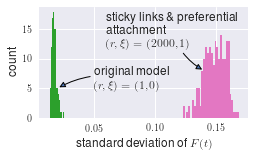

In [12]:
colors = {(1, 0): '#2ca02c', (2000, 1): '#e377c2'}
fig, ax = plt.subplots(figsize=(3.4, 3.4 / 5 * 3))
grouped_std_F = long_run_variance_simulations.groupby(['r', 'xi'])['std_F']
for r_xi, df in grouped_std_F:
    ax.hist(df, bins=30, normed=False, color=colors[r_xi])
ax.set_xlabel('standard deviation of $F(t)$', size=12)
ax.set_ylabel('count', size=12)

ax.annotate(
    'original model\n'
    r'$(r, \xi) = (1, 0)$',
    xy=(.02, 5), xytext=(.05, 5), xycoords='data', textcoords='data',
    arrowprops=dict(arrowstyle="-|>", linewidth=1, connectionstyle="arc3,rad=.2"))

ax.annotate(
    'sticky links \& preferential \nattachment\n'
    r'$(r, \xi) = (2000, 1)$',
    xy=(.14, 8), xytext=(.06, 12), xycoords='data', textcoords='data',
    arrowprops=dict(arrowstyle="-|>", linewidth=1, connectionstyle="arc3,rad=.2"))

fig.tight_layout(pad=.15)
fig.savefig(os.path.join(figures_path, 'compare_std_dev_F.pdf'))
plt.show()

Next we group by `(r, xi)` and then compute the mean and standard deviation of the mean of the time-series.

In [13]:
compare_std_F = long_run_variance_simulations.groupby(['r', 'xi']).std_F.agg(
    {'mean_std_F': 'mean', 'std_std_F': 'std', 'count': 'size'})
compare_std_F

,,count,mean_std_F,std_std_F
r,xi,,,
1,0,200,0.017368,0.002047
2000,1,200,0.148679,0.008997


The sticky links + preferential attachment model has a variance that is 8.6 times larger:

In [14]:
compare_std_F.loc[(2000, 1)].mean_std_F / compare_std_F.loc[(1, 0)].mean_std_F

8.5603155914693208

This 8.6-fold difference amounts to a difference in 14.6 standard deviations:

In [15]:
((compare_std_F.loc[(2000, 1)].mean_std_F - compare_std_F.loc[(1, 0)].mean_std_F) /
 compare_std_F.loc[(2000, 1)].std_std_F)

14.594320683612567

In a two-sided t-test (using [scipy's `ttest_ind`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.mstats.ttest_ind.html)) that allows for unequal variances in the two populations (because, as found below, the variances are found to be statistically significantly different), we obtain a p-value of `5.3e-251`:

In [16]:
std_F_sticky_PA = long_run_variance_simulations.groupby(['r', 'xi']).get_group((2000, 1)).std_F
std_F_original_model = long_run_variance_simulations.groupby(['r', 'xi']).get_group((1, 0)).std_F

print('two-sided t-test: ', stats.ttest_ind(std_F_sticky_PA, std_F_original_model, equal_var = False))

two-sided t-test:  Ttest_indResult(statistic=201.25107600636568, pvalue=5.3738774686082749e-251)


We also find that a two-sided [Mann-Whitney U test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) has a very small p-value (`1e-67`):

In [17]:
stats.mannwhitneyu(std_F_sticky_PA, std_F_original_model, alternative='two-sided')

MannwhitneyuResult(statistic=40000.0, pvalue=4.8281376854765731e-67)

##### Check normality and different variances

Below we find that the standard deviations of the time-series $F(t)$ (plotted as a histogram above) are normal with p-values `0.06` and `2.6e-5`.

In [18]:
print('standard deviation of the time-series F(t) in the sticky links + preferential attachment model (r, xi) = (2000, 1)')
print('-' * 114)
print('    variance: ', np.var(std_F_sticky_PA))
print('    normality test: ', stats.normaltest(std_F_sticky_PA), end='\n' * 3)

print('standard deviation of the time-series F(t) in the original model (r, xi) = (1, 0)')
print('-' * 81)
print('    variance: ', np.var(std_F_original_model))
print('    normality test: ', stats.normaltest(std_F_original_model))

standard deviation of the time-series F(t) in the sticky links + preferential attachment model (r, xi) = (2000, 1)
------------------------------------------------------------------------------------------------------------------
    variance:  8.054778432476105e-05
    normality test:  NormaltestResult(statistic=5.5066638428481633, pvalue=0.063715213056550507)


standard deviation of the time-series F(t) in the original model (r, xi) = (1, 0)
---------------------------------------------------------------------------------
    variance:  4.170068846415391e-06
    normality test:  NormaltestResult(statistic=21.06662330621657, pvalue=2.6634274591990452e-05)


According to the [Bartlett test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett), their variances are different (p-value `2.6e-74`), so we reject the null hypothesis that they are drawn from populations with the same variance.

In case the sticky/preferential attachment model's standard deviation of $F(t)$ is not normally distributed, we also use the [Levene test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html) with the parameter `center` set to the `'mean'` and to `'median'` (to check both).

In all three cases, we get a very small p-value (`1e-74`, `1e-44`, `1e-42`, respectively), so we reject the null hypothesis that the variances are the same, and hence in the two-sided t-test above we set the keyword argument `equal_var` to `False`.

In [19]:
print('Bartlett test (null hypothesis: equal variance; used for normal data):\n\t',
      stats.bartlett(std_F_sticky_PA, std_F_original_model), end='\n\n')
print('Levene test with center=mean (null hypothesis: equal variance; used for potentially non-normal data)\n\t',
     stats.levene(std_F_sticky_PA, std_F_original_model, center='mean'), end='\n\n')
print('Levene test with center=mean (null hypothesis: equal variance; used for potentially non-normal data)\n\t',
     stats.levene(std_F_sticky_PA, std_F_original_model, center='median'))

Bartlett test (null hypothesis: equal variance; used for normal data):
	 BartlettResult(statistic=332.60377934742064, pvalue=2.6042782685094785e-74)

Levene test with center=mean (null hypothesis: equal variance; used for potentially non-normal data)
	 LeveneResult(statistic=248.44480534686394, pvalue=7.7379686849418843e-44)

Levene test with center=mean (null hypothesis: equal variance; used for potentially non-normal data)
	 LeveneResult(statistic=236.54816519290674, pvalue=3.1656839924059174e-42)


## Dependencies

In [20]:
import sys
sys.version

'3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) \n[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]'

In [21]:
import joblib
for pkg in [mpl, pd, sns, np, progressbar, joblib]:
    print(pkg.__name__, pkg.__version__)

matplotlib 2.0.0
pandas 0.19.2
seaborn 0.7.1
numpy 1.11.3
progressbar 3.12.0
joblib 0.10.3
